<a href="https://colab.research.google.com/github/felipehigon/Batman/blob/main/Hunger_games_Felipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

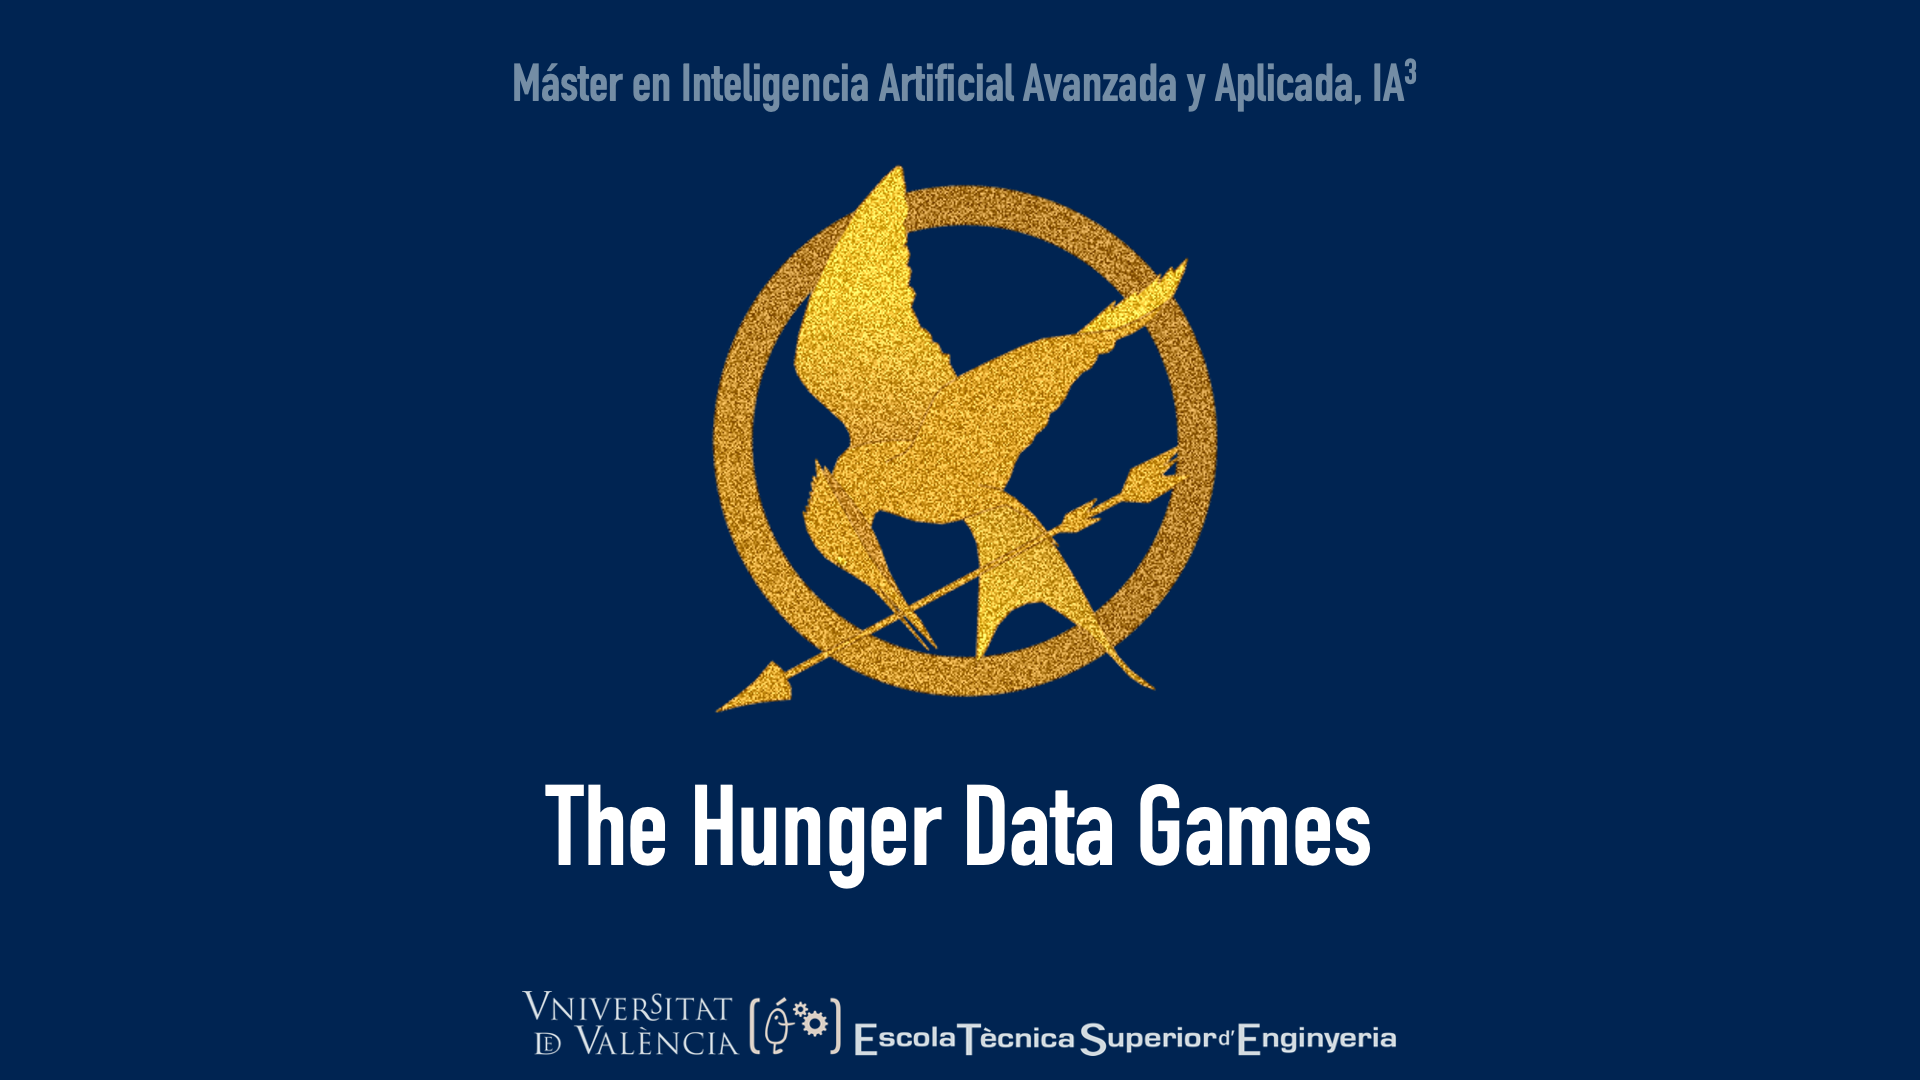

Wellcome to the first hunger data games!!! You have been selected as tributes from your sectors. In this edition you will be facing each other in a classification competition. The dataset you will be facing is this one:



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/felipehigon/Entrega_Modelo_ML/main/glass.csv?token=ARP3RVZVZJKDRPPF7H5GUSS7WV2SC"
dataframe = pd.read_csv(url)

#url = "https://raw.githubusercontent.com/CuadraAlconero/IDAL_IA3_CuadraAlconero/main/hunger_data.csv"
#dataframe = pd.read_csv(url, header=0)
#dataframe.drop("Unnamed: 0", axis=1, inplace=True)
dataframe.columns = ["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron", "type_of_glass"]

The target variable is type_of_glass

In [ ]:
dataframe.head(10)

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


A few recommendations for you to solve the exercise. Remember the different types of algorithm that we have studied and follow a natural path in building the exercise. Commence using a single estimator and try to build a bagging estimator.

For the evaluation metric check this webpage:

https://scikit-learn.org/stable/modules/model_evaluation.html

Specially check those called balanced_accuracy and f1_micro.

Finally the submission of the exercise must be a model file with the name of your team (find one which is cool I will add the coolness of the name to the final grade). 

Check this webpage for saving the model: https://scikit-learn.org/stable/modules/model_persistence.html

One more thing I will evaluate using the np.random.seed(123) use it for training your model.

In [ ]:
dataframe.describe()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
dataframe.isna().sum()

refractive_index    0
sodium              0
magnesium           0
aluminum            0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
type_of_glass       0
dtype: int64

In [ ]:
dataframe.isnull().sum()

refractive_index    0
sodium              0
magnesium           0
aluminum            0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
type_of_glass       0
dtype: int64

In [ ]:
#f1_micro y balanced_accuracy
#cross validation no hay muchos datos

X = dataframe.drop(['type_of_glass'], axis=1)
X

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [ ]:
X.corr()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
refractive_index,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
sodium,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
magnesium,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
aluminum,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
silicon,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
potassium,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
calcium,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
barium,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
iron,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


In [ ]:
dataframe['type_of_glass'].unique()

array([1, 2, 3, 5, 6, 7])

In [ ]:
import plotly.express as px
fig = px.scatter(dataframe, x="calcium", y="refractive_index" , color="type_of_glass")
fig.show()

In [ ]:
fig = px.scatter(dataframe, x="silicon", y="refractive_index" , color="type_of_glass")
fig.show()

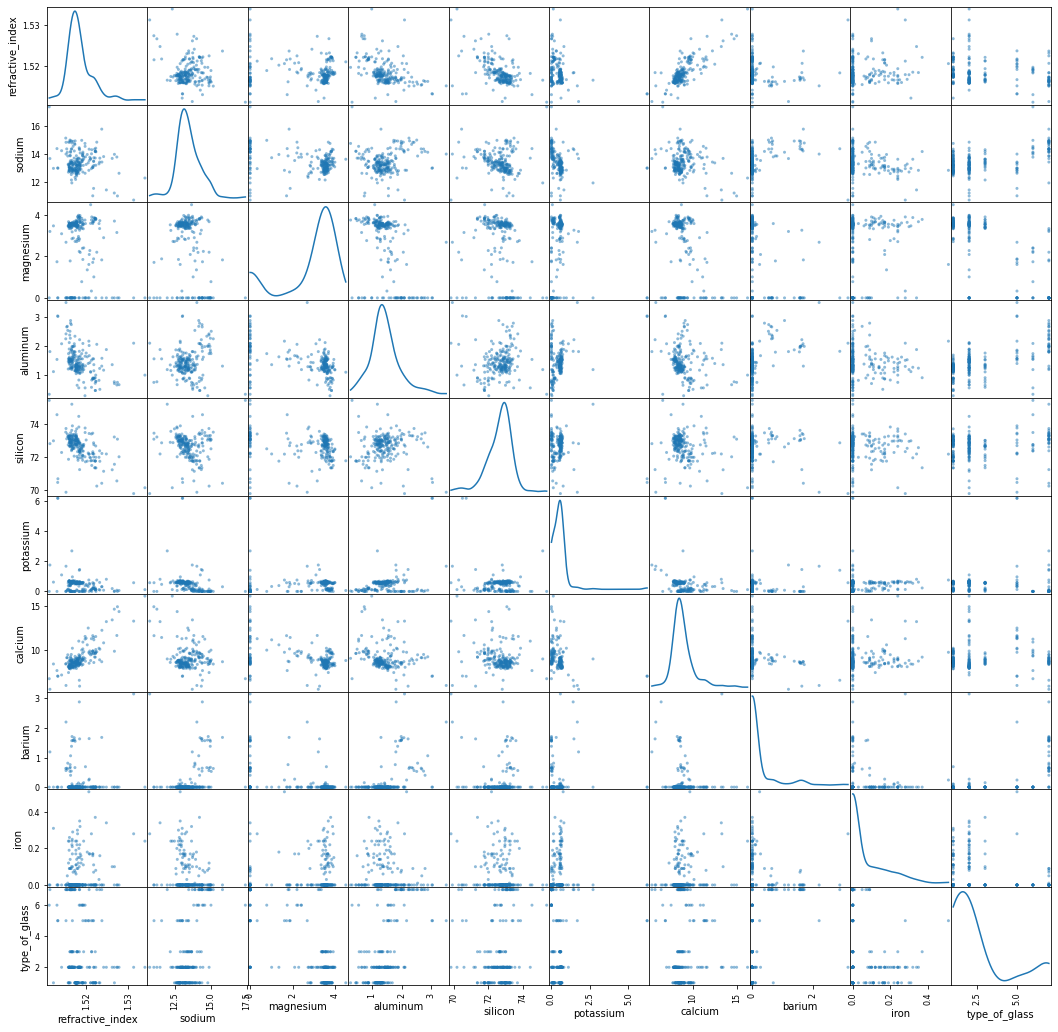

In [ ]:
pd.plotting.scatter_matrix(dataframe, figsize=(18.0,18.0),diagonal='kde');

In [ ]:
Y = dataframe.loc[:,['type_of_glass']]
Y

,type_of_glass
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [ ]:
# Entrenamiento y evaluación del modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(123)

# Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
# generamos el modelo
model = DecisionTreeClassifier(min_samples_split=2,max_depth=6,criterion='entropy')
# entrenamos con train
model.fit(X_train, Y_train)
# evaluamos con test
model.score(X_test, Y_test)

0.7592592592592593

In [ ]:
X.columns

Index(['refractive_index', 'sodium', 'magnesium', 'aluminum', 'silicon',
       'potassium', 'calcium', 'barium', 'iron'],
      dtype='object')

In [ ]:
# Probamos a eliminar cada una de las muestras para ver si hay cambios en el score
for a in X.columns:
  X_1 = X.drop(a, axis=1)
  # Split
  X_train, X_test, Y_train, Y_test = train_test_split(X_1, Y)
  # generamos el modelo
  model = DecisionTreeClassifier(min_samples_split=2,max_depth=6,criterion='entropy')
  # entrenamos con train
  model.fit(X_train, Y_train)
  # evaluamos con test
  print("Quitando: ", a, model.score(X_test, Y_test), "\n")

Quitando:  refractive_index 0.7407407407407407 

Quitando:  sodium 0.7037037037037037 

Quitando:  magnesium 0.6296296296296297 

Quitando:  aluminum 0.6666666666666666 

Quitando:  silicon 0.7222222222222222 

Quitando:  potassium 0.7222222222222222 

Quitando:  calcium 0.7037037037037037 

Quitando:  barium 0.6296296296296297 

Quitando:  iron 0.7962962962962963 



In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [3,4,5,6,7,8,9,10,11], 'min_samples_split': [1,2,3,4,5,6,7]}
#model = DecisionTreeClassifier()
cv = GridSearchCV(model, param_grid, scoring="f1_micro", cv=10)

[Text(141.82500000000002, 203.85, 'magnesium <= 2.695\nentropy = 2.13\nsamples = 160\nvalue = [58, 56, 13, 9, 7, 17]'),
 Text(62.0, 176.67000000000002, 'calcium <= 9.51\nentropy = 1.93\nsamples = 42\nvalue = [0, 10, 0, 9, 7, 16]'),
 Text(24.8, 149.49, 'silicon <= 71.655\nentropy = 1.023\nsamples = 21\nvalue = [0, 0, 0, 2, 3, 16]'),
 Text(12.4, 122.31, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0, 0]'),
 Text(37.2, 122.31, 'barium <= 0.27\nentropy = 0.629\nsamples = 19\nvalue = [0, 0, 0, 0, 3, 16]'),
 Text(24.8, 95.13, 'entropy = 0.811\nsamples = 4\nvalue = [0, 0, 0, 0, 3, 1]'),
 Text(49.6, 95.13, 'entropy = 0.0\nsamples = 15\nvalue = [0, 0, 0, 0, 0, 15]'),
 Text(99.2, 149.49, 'sodium <= 13.99\nentropy = 1.494\nsamples = 21\nvalue = [0, 10, 0, 7, 4, 0]'),
 Text(86.8, 122.31, 'aluminum <= 1.38\nentropy = 0.989\nsamples = 16\nvalue = [0, 9, 0, 7, 0, 0]'),
 Text(74.4, 95.13, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0, 0, 0]'),
 Text(99.2, 95.13, 'iron <= 0.09\nentropy = 0.881\

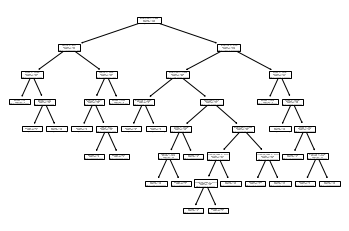

In [ ]:
plot_tree(model, feature_names=X.columns)

In [ ]:
cv.fit(X_train, Y_train)
cv.cv_results_
cv.best_estimator_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 7 members, which is less than n_splits=10.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these par

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1], drop_intermediate=False, pos_label=1)
df_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':thresholds})

fig = px.line(df_roc, x='fpr', y='tpr', hover_data=['threshold'])
fig.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=10,min_samples_split=2,max_depth=6, criterion='entropy')

model2.fit(X_train, Y_train)

print(model2.score(X_test, Y_test))

0.7407407407407407


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

